In [1]:
import sys

from matplotlib import pyplot as plt

In [2]:
sys.__stdout__ = sys.stdout 

In [3]:
import json
from django.contrib.gis.geos.geometry import GEOSGeometry
import geopandas as gpd
from datacube.api import GridWorkflow

from madmex.wrappers import gwf_query
from madmex.models import PredictObject

2020-07-14 15:10:23,032 - datacube.drivers.driver_cache - driver_cache safe_load: Failed to resolve driver datacube.plugins.index::s3aio_index
2020-07-14 15:10:23,034 - datacube.drivers.driver_cache - driver_cache safe_load: Error was: UndefinedEnvironmentName("'extra' does not exist in evaluation environment.",)


In [4]:
sys.stdout = sys.__stdout__

# S2 product 10 m

In [5]:
region = 'mexico_Quintana_Roo'
name_of_product = 'recipe_mex_s2_10m_scl_2018_2019'
begin = '2018-01-01'
end = '2019-12-31'
gwf_kwargs = {'region': region, 'product': name_of_product, 'begin': begin, 'end':end}
iterable = gwf_query(**gwf_kwargs)

In [6]:
lista_iter_10m = list(iterable)

In [7]:
lista_iter_10m_sorted = sorted(lista_iter_10m, key = lambda x: (x[0][0], x[0][1]))

In [8]:
#!pip3 install --user descartes

(56, -31)


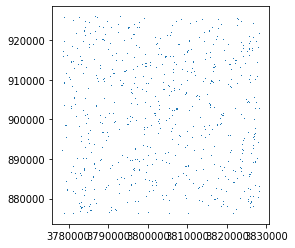

(57, -34)


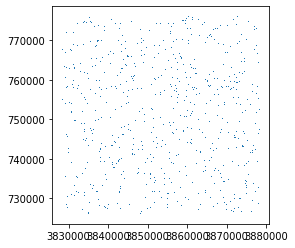

(57, -33)


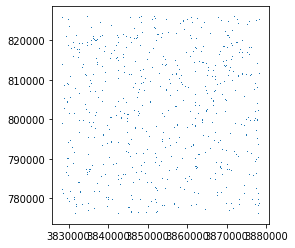

(57, -32)


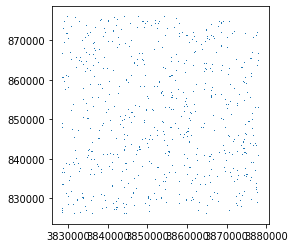

(57, -31)


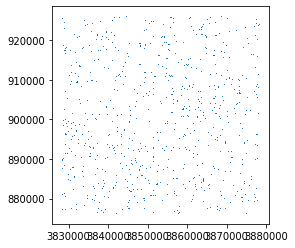

(57, -30)


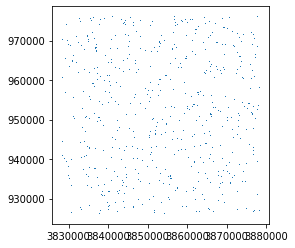

(58, -35)


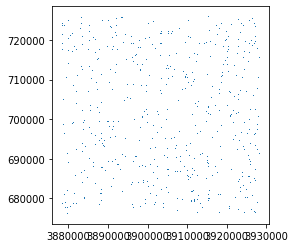

(58, -34)


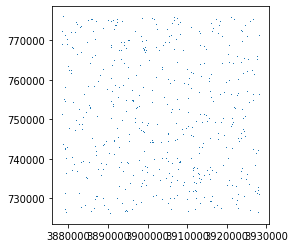

(58, -33)


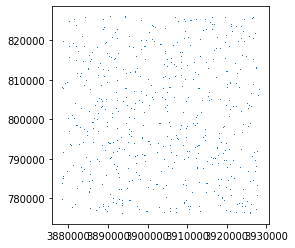

(58, -32)


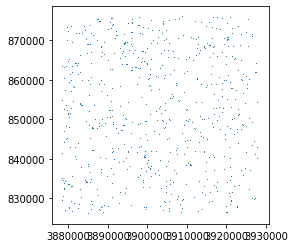

(58, -31)


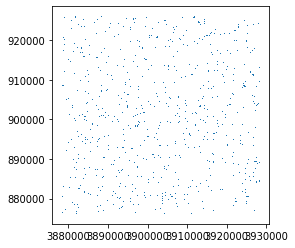

(58, -30)


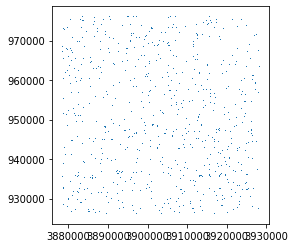

(58, -29)


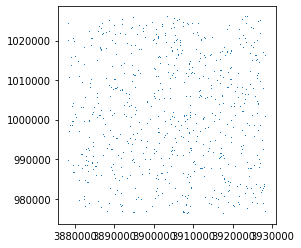

(59, -33)


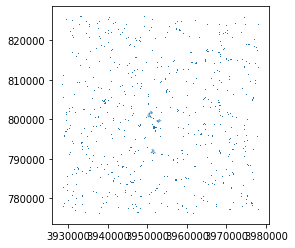

(59, -32)


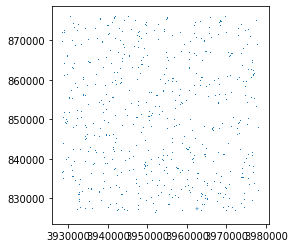

(59, -31)


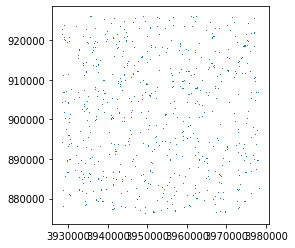

(59, -30)


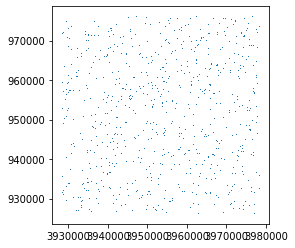

(59, -29)


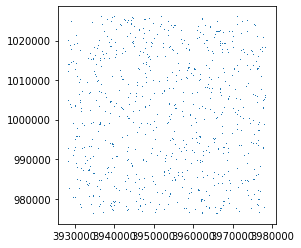

(59, -28)


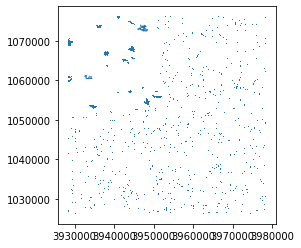

(60, -34)


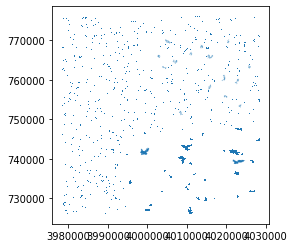

(60, -33)


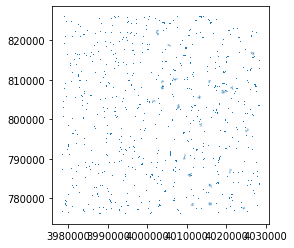

(60, -32)


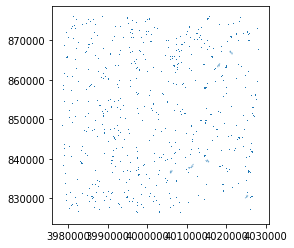

(60, -31)


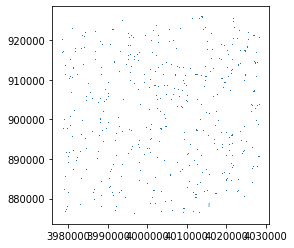

(60, -30)


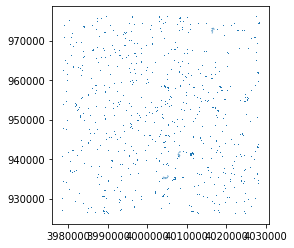

(60, -29)


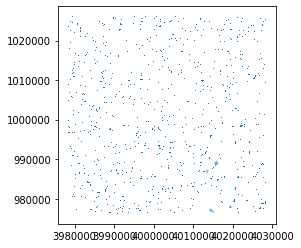

(60, -28)


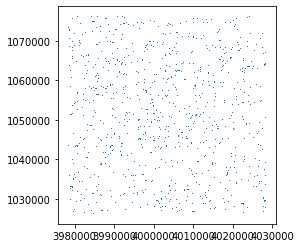

(60, -27)


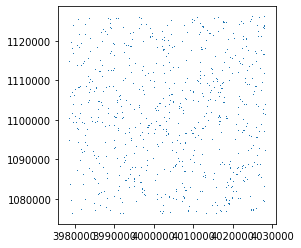

(60, -26)


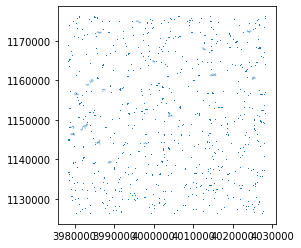

(61, -33)


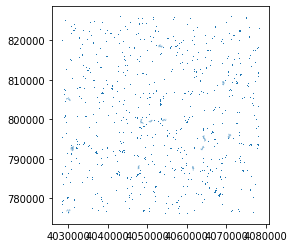

(61, -32)


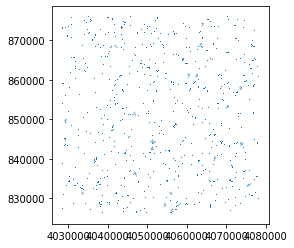

(61, -29)


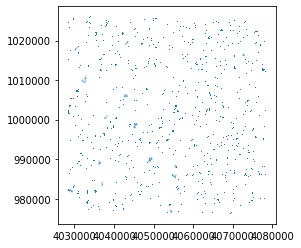

(61, -28)


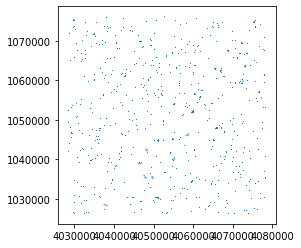

(61, -27)


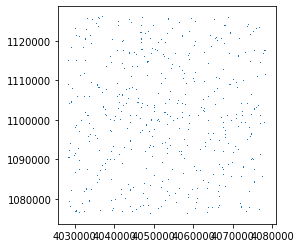

(61, -26)


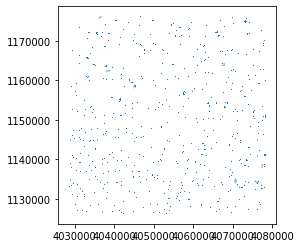

(62, -28)


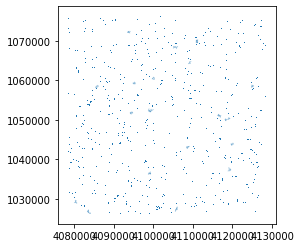

In [9]:
for tile in lista_iter_10m_sorted:
    print(tile[0])
    sr_0 = GridWorkflow.load(tile[1],dask_chunks={'x': 1600, 'y': 1600})
    #read segmentation
    geom = GEOSGeometry(json.dumps(sr_0.geobox.geographic_extent.json))
    seg_name = 'seg_mex_s2_10m_scl_2018_2019'
    qs = PredictObject.objects.filter(the_geom__contained=geom,segmentation_information__name=seg_name)
    path_seg = qs[0].path
    gdf = gpd.read_file(path_seg)
    gdf_sample = gdf.sample(n=5000)
    gdf_sample.plot()
    plt.show()

In [ ]:
len()